# BUILDING THE TRAINED MODEL

DATA PREPROCESSING

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('../dataset/upi_fraud_dataset.csv', index_col = 0)

In [3]:
import numpy as np

In [4]:
x = dataset.iloc[ : , : 10].values
y = dataset.iloc[ : , 10].values

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

In [7]:
x_train.shape

(2266, 10)

In [8]:
x_test.shape

(400, 10)

In [9]:
fraud = np.count_nonzero(y_train == 1)
valid = np.count_nonzero(y_train == 0)

In [10]:
print('Fraud cases in training data =', fraud)
print('Valid cases in training data =', valid)

Fraud cases in training data = 1348
Valid cases in training data = 918


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
x_train[ : 5]

array([[ 1.11287494,  0.23492331, -0.89608107,  0.        ,  0.0602433 ,
         0.68096147,  0.83994401, -0.84340161, -0.45791225, -1.64639185],
       [-1.1894848 , -0.92886509,  0.66178275,  0.        , -1.24483613,
        -0.3824002 , -0.27301162, -0.83469894,  1.03866827, -0.4058421 ],
       [ 1.11287494, -1.02584746,  2.53121934,  0.        ,  0.32125918,
        -0.38240085,  1.63491233,  1.40609705, -0.31538077,  0.32896382],
       [-1.1894848 ,  0.91379987, -0.89608107,  0.        , -1.24483613,
        -1.11969157, -0.3790074 , -0.72010938, -0.24411503,  0.5966091 ],
       [ 1.11287494,  0.42888804, -0.89608107,  0.        , -1.76686789,
        -1.11969169, -0.8029905 ,  0.14610555,  1.18119975,  1.37176053]])

In [14]:
x_test[ : 5]

array([[ 0.99775696, -1.02584746,  0.66178275,  0.        , -1.50585201,
        -0.38240103, -0.8029905 , -0.55231661, -0.24411503,  0.60587057],
       [-1.30460278,  1.6896588 , -0.89608107,  0.        , -0.72280436,
        -0.93972315,  0.09797359, -0.10066076, -1.66942982,  1.78976412],
       [-1.07436681,  0.33190567, -0.27293554,  0.        , -1.24483613,
        -0.38240071, -0.96198416, -0.63173177,  0.46854236, -1.33247671],
       [ 0.53728501, -1.21981219,  0.66178275,  0.        ,  1.10430683,
         1.8381786 ,  0.94593979,  1.36440214, -0.24411503,  0.62521842],
       [ 0.07681306, -1.02584746, -0.27293554,  0.        , -0.20077259,
        -0.38240113, -0.22001374, -0.63409578, -0.67170947,  0.8568677 ]])

LOGISTIC REGRESSION (LR)

In [15]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state = 0)
LR_model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [16]:
y_pred = LR_model.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
acc_lr = accuracy_score(y_test, y_pred)

In [19]:
print(acc_lr)

0.8025


K-NEAREST NEIGHBORS (KNN)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(x_train, y_train)

KNeighborsClassifier()

In [21]:
y_pred = KNN_model.predict(x_test)

In [22]:
acc_knn = accuracy_score(y_test, y_pred)

In [23]:
print(acc_knn)

0.83


SUPPORT VECTOR MACHINE (SVM)

In [24]:
from sklearn.svm import SVC
SVM_model = SVC(kernel = 'linear', random_state = 0)
SVM_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [25]:
y_pred = SVM_model.predict(x_test)

In [26]:
acc_svm = accuracy_score(y_test, y_pred)

In [27]:
print(acc_svm)

0.815


NAIVE BAYES (NB)

In [28]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [29]:
y_pred = NB_model.predict(x_test)

In [30]:
acc_nb = accuracy_score(y_test, y_pred)

In [31]:
print(acc_nb)

0.8125


DECISION TREE (DT)

In [32]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [33]:
y_pred = DT_model.predict(x_test)

In [34]:
acc_dt = accuracy_score(y_test, y_pred)

In [35]:
print(acc_dt)

0.95


RANDOM FOREST (RF)

In [36]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
y_pred = RF_model.predict(x_test)

In [38]:
acc_rf = accuracy_score(y_test, y_pred)

In [39]:
print(acc_rf)

0.9575


CONVOLUTIONAL NEURAL NETWORK (CNN)

In [40]:
import tensorflow as tf

In [41]:
CNN_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(10,)),               
    tf.keras.layers.Dense(64, activation='relu'),      
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [42]:
# CNN_model.add(tf.keras.layers.Dense(64, input_dim = 10, activation = 'relu'))
# CNN_model.add(tf.keras.layers.Dense(128, activation = 'relu'))
# CNN_model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [43]:
CNN_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [44]:
CNN_model.fit(x_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7070 - loss: 0.5396
Epoch 2/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8177 - loss: 0.3998
Epoch 3/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8336 - loss: 0.3569
Epoch 4/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8438 - loss: 0.3365
Epoch 5/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8513 - loss: 0.3293
Epoch 6/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8522 - loss: 0.3200
Epoch 7/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8645 - loss: 0.3096
Epoch 8/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8667 - loss: 0.3039
Epoch 9/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8733 - loss: 0.2991
Epoch 10/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8756 - loss: 0.2973
Epoch 11/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8689 - loss: 0.2919
Epoch 12/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [45]:
loss, acc_cnn = CNN_model.evaluate(x_train, y_train, verbose = 0)

In [46]:
print(acc_cnn)

0.999117374420166


In [47]:
y_pred = CNN_model.predict(x_test)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


ACCURACY COMPARISON OF ALL THE MODELS

In [48]:
from xgboost import XGBClassifier

In [49]:
XGB_model = XGBClassifier(random_state=0)

In [50]:
XGB_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [51]:
y_pred = XGB_model.predict(x_test)

In [52]:
acc_xgb = accuracy_score(y_test, y_pred)

In [53]:
print("XGBoost Accuracy:", acc_xgb)

XGBoost Accuracy: 0.955


In [54]:
scores = [acc_lr * 100,
          acc_knn * 100,
          acc_svm * 100,
          acc_nb * 100,
          acc_dt * 100,
          acc_rf * 100,
          acc_cnn * 100,
          acc_xgb * 100]

In [55]:
import joblib

In [56]:
joblib.dump(XGB_model, '../project_model.pkl') 

['../project_model.pkl']

In [57]:
names = ["Logistic Regression",
        "K-Nearest Neighbors",
        "Support Vector Machine",
        "Naive Bayes",
        "Decision Tree",
        "Random Forest",
        "Convolutional Neural Network",
        "XGBoost"]

In [58]:
df = pd.DataFrame()
df['Algorithm Name'] = names
df['Accuracy Score (%)'] = scores
df = df.sort_values('Accuracy Score (%)', ascending = False)

In [59]:
df

,Algorithm Name,Accuracy Score (%)
6,Convolutional Neural Network,99.911737
5,Random Forest,95.750000
7,XGBoost,95.500000
4,Decision Tree,95.000000
1,K-Nearest Neighbors,83.000000
2,Support Vector Machine,81.500000
3,Naive Bayes,81.250000
0,Logistic Regression,80.250000


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

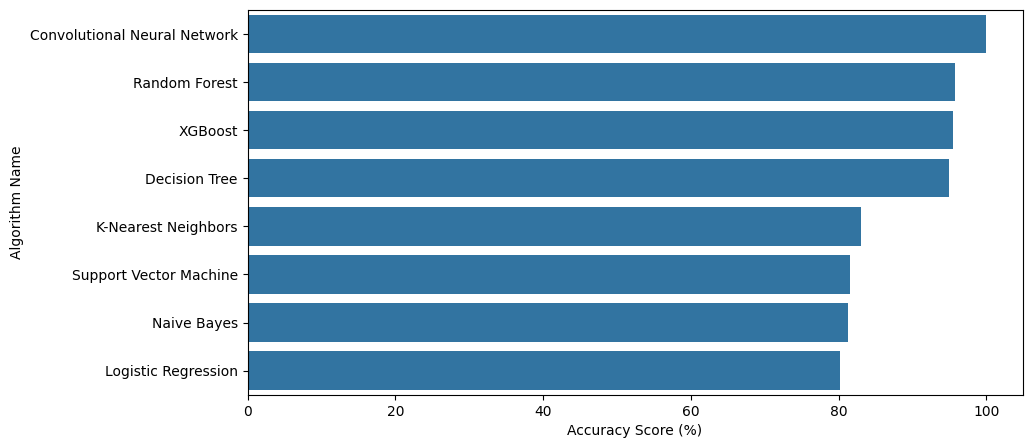

In [61]:
fig = plt.subplots(figsize = (10, 5))
ax = sns.barplot(x = "Accuracy Score (%)", y = "Algorithm Name", data = df)

SAVING THE BEST TRAINED MODEL

In [62]:
import joblib


In [63]:
feature_names = dataset.columns[:10].tolist()


In [64]:
print("Model was trained with this feature order:")
print(feature_names)

Model was trained with this feature order:
['trans_hour', 'trans_day', 'trans_month', 'trans_year', 'category', 'upi_number', 'age', 'trans_amount', 'state', 'zip']


In [65]:
joblib.dump(scaler, '../scaler.pkl')

['../scaler.pkl']

In [66]:
joblib.dump(XGB_model, '../project_model.pkl')

['../project_model.pkl']

In [67]:
joblib.dump(feature_names, '../feature_names.pkl')


['../feature_names.pkl']

In [68]:
print("Successfully saved scaler.pkl, project_model.pkl, and feature_names.pkl")


Successfully saved scaler.pkl, project_model.pkl, and feature_names.pkl


In [69]:
import matplotlib.pyplot as plt

In [70]:
import seaborn as sns


In [71]:
importances = XGB_model.feature_importances_

In [72]:
feature_names = dataset.columns[:10].tolist()


In [73]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

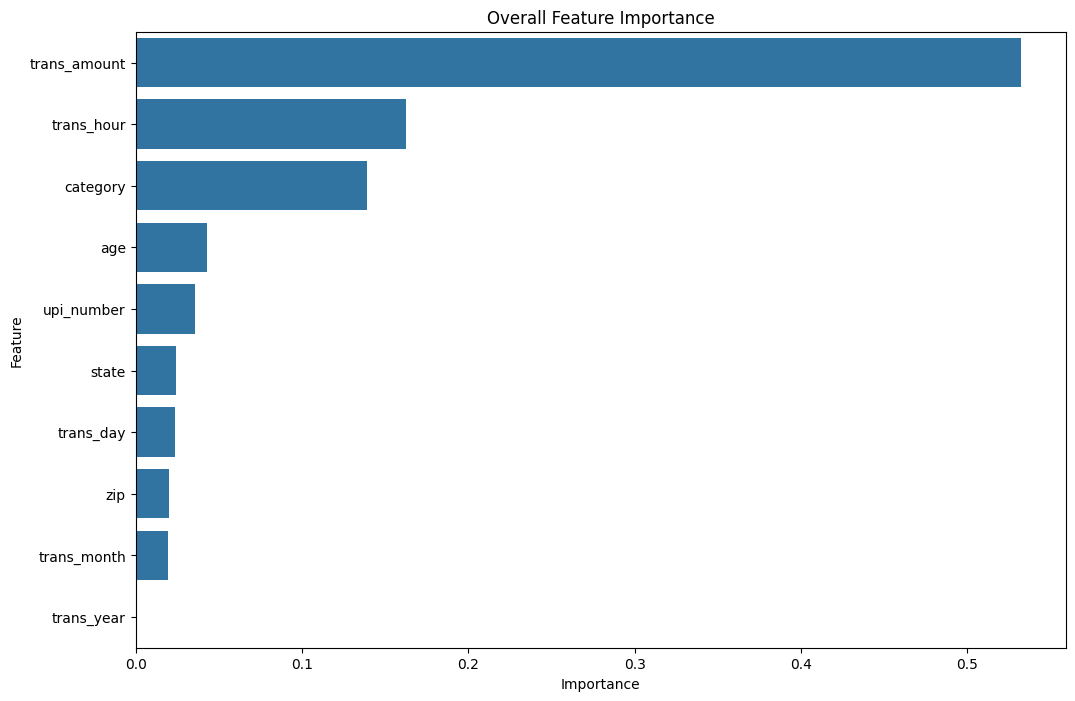

In [74]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Overall Feature Importance')
plt.show()